# Overfitting and Underfitting

In [18]:
dataset_path = "../datasets/dataset-logreg-nn/DATASET/"

In [19]:
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk(dataset_path):
        print(dirname)

../datasets/dataset-logreg-nn/DATASET/
../datasets/dataset-logreg-nn/DATASET/TEST
../datasets/dataset-logreg-nn/DATASET/TEST\O
../datasets/dataset-logreg-nn/DATASET/TEST\R
../datasets/dataset-logreg-nn/DATASET/TRAIN
../datasets/dataset-logreg-nn/DATASET/TRAIN\O
../datasets/dataset-logreg-nn/DATASET/TRAIN\R


## Import libraries

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pathlib

In [21]:
print(tf.__version__)

2.16.1


## Import data

### Dataset description

In [22]:
data_dir = pathlib.Path(dataset_path)
image_count = len(list(data_dir.glob('*/*/*.jpg')))
print('Total images:', image_count)

Total images: 25077


### Train images

In [23]:
train_dir = pathlib.Path(dataset_path + '/TRAIN')
train_image_count = len(list(train_dir.glob('*/*.jpg')))
print('Training images:', train_image_count)

Training images: 22564


### Test images

In [24]:
test_dir = pathlib.Path(dataset_path + '/TEST')
test_image_count = len(list(test_dir.glob('*/*.jpg')))
print('Testing images:', test_image_count)

Testing images: 2513


## Create dataset

In [25]:
img_height = 224
img_width = 224
batch_size = 64
number_of_epochs = 20

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 22564 files belonging to 2 classes.


In [27]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2513 files belonging to 2 classes.


#### Classnames

In [28]:
train_class_names = train_ds.class_names
number_of_classes = len(train_class_names)
print(train_class_names)
print('Number of classes:', number_of_classes)

['O', 'R']
Number of classes: 2


In [29]:
test_class_names = test_ds.class_names
print(test_class_names)

['O', 'R']


## Visualize the data

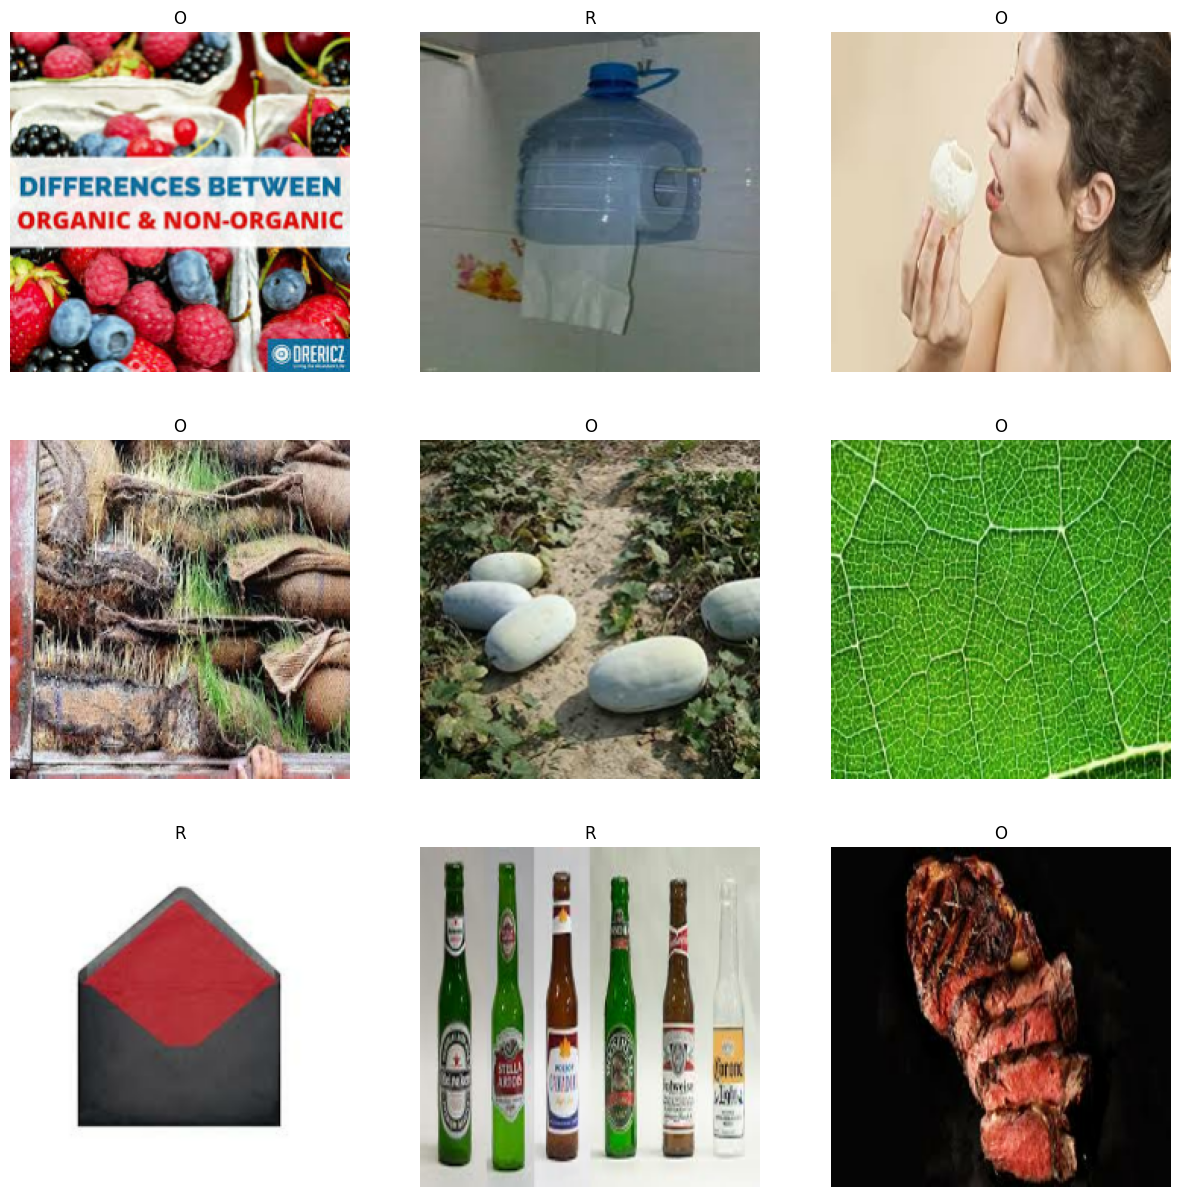

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[labels[i]])
    plt.axis(False)

## The model

### Configure dataset for performance

In [31]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Train the model

In [32]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(number_of_classes)
])

model.build(input_shape=(None, img_height, img_width, 3))

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

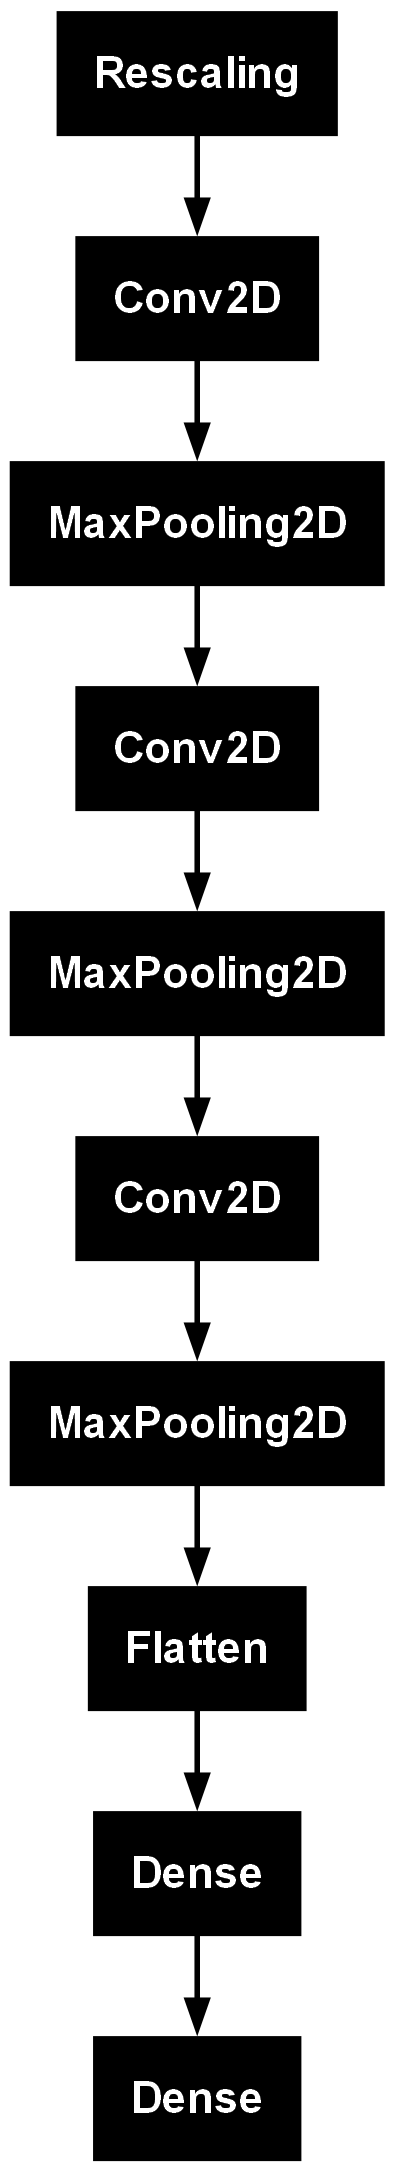

In [33]:
tf.keras.utils.plot_model(model)

In [34]:
model_hist = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=number_of_epochs
)

Epoch 1/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 255s 716ms/step - accuracy: 0.7739 - loss: 0.4870 - val_accuracy: 0.8778 - val_loss: 0.3307
Epoch 2/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 265s 751ms/step - accuracy: 0.8449 - loss: 0.3641 - val_accuracy: 0.8922 - val_loss: 0.2845
Epoch 3/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 253s 715ms/step - accuracy: 0.8664 - loss: 0.3199 - val_accuracy: 0.8961 - val_loss: 0.2796


> Note: the more epochs, the more overfitting will occur

To optimize the bias and variance in a Convolutional Neural Network (CNN) model, you can adjust various hyperparameters and training strategies. Here are some parameters you can consider tuning:

1. **Model Complexity**:
   - **Increase/Decrease Number of Convolutional Layers**: Adding more convolutional layers can increase the model's capacity to learn intricate features, potentially reducing bias. However, adding too many layers may lead to overfitting, increasing variance.
   - **Increase/Decrease Number of Filters**: Adjusting the number of filters in each convolutional layer can affect the model's ability to extract features of different complexity. More filters can capture more details but may increase the model's complexity and risk overfitting.

2. **Regularization**:
   - **Add Dropout Layers**: Dropout layers randomly drop a fraction of neurons during training, preventing the network from relying too heavily on specific neurons and features. This can help reduce overfitting and variance.
   - **Apply L2 Regularization**: L2 regularization penalizes large weights in the model's parameters, encouraging simpler models and reducing overfitting.

3. **Pooling Strategy**:
   - **Adjust Pooling Size**: Changing the size of the pooling window can affect the level of abstraction in the feature maps. Larger pooling sizes can reduce the model's spatial resolution, potentially reducing overfitting.

4. **Learning Rate and Optimization Algorithm**:
   - **Adjust Learning Rate**: The learning rate controls the size of the updates to the model's weights during training. Finding an appropriate learning rate can affect the convergence speed and stability of training.
   - **Explore Different Optimization Algorithms**: Different optimization algorithms, such as Adam, RMSprop, or SGD with momentum, may perform differently on your dataset. Experimenting with different optimizers can help find the one that works best for your model.

5. **Data Augmentation**:
   - **Apply Data Augmentation**: Augmenting the training data with techniques like rotation, translation, scaling, and flipping can increase the diversity of the training set, helping the model generalize better and reducing overfitting.

6. **Early Stopping**:
   - **Implement Early Stopping**: Monitor the model's performance on a validation set during training and stop training when the performance starts to degrade. This prevents the model from overfitting to the training data.

7. **Cross-Validation**:
   - **Use Cross-Validation**: Split your dataset into training, validation, and test sets and use techniques like k-fold cross-validation to estimate the model's performance more accurately and reduce variance.

By tuning these parameters and employing appropriate training strategies, you can optimize the bias and variance of your CNN model, leading to better generalization performance on unseen data. Experiment with different combinations of parameters and monitor the model's performance on validation data to find the optimal settings for your specific task and dataset.

### Smaller model

In [35]:
smaller_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(number_of_classes)
])

smaller_model.build(input_shape=(None, img_height, img_width, 3))

smaller_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [36]:
smaller_model_hist = smaller_model.fit(
    train_ds,
    epochs=number_of_epochs,
    validation_data=test_ds
)

Epoch 1/3


353/353 ━━━━━━━━━━━━━━━━━━━━ 118s 328ms/step - accuracy: 0.7590 - loss: 0.6994 - val_accuracy: 0.8850 - val_loss: 0.3196
Epoch 2/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 115s 327ms/step - accuracy: 0.8413 - loss: 0.3697 - val_accuracy: 0.8945 - val_loss: 0.2938
Epoch 3/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 108s 305ms/step - accuracy: 0.8639 - loss: 0.3265 - val_accuracy: 0.8774 - val_loss: 0.3268


### Bigger model

In [37]:
bigger_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(number_of_classes)
])

bigger_model.build(input_shape=(None, img_height, img_width, 3))

bigger_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [38]:
bigger_model_hist = bigger_model.fit(
    train_ds,
    epochs=number_of_epochs,
    validation_data=test_ds
)

Epoch 1/3


353/353 ━━━━━━━━━━━━━━━━━━━━ 712s 2s/step - accuracy: 0.7686 - loss: 0.4841 - val_accuracy: 0.8735 - val_loss: 0.3661
Epoch 2/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.8361 - loss: 0.3836 - val_accuracy: 0.8961 - val_loss: 0.2798
Epoch 3/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 675s 2s/step - accuracy: 0.8555 - loss: 0.3469 - val_accuracy: 0.8902 - val_loss: 0.2685


### Compare the models

#### Original vs Smaller one

In [39]:
epochs = range(1, 4)
print(model_hist.history)
model_val_loss = model_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

{'accuracy': [0.8102729916572571, 0.8509572744369507, 0.8701471090316772], 'loss': [0.42548468708992004, 0.3523506820201874, 0.3107076585292816], 'val_accuracy': [0.8778352737426758, 0.8921607732772827, 0.8961400985717773], 'val_loss': [0.33069053292274475, 0.2845129668712616, 0.27955108880996704]}


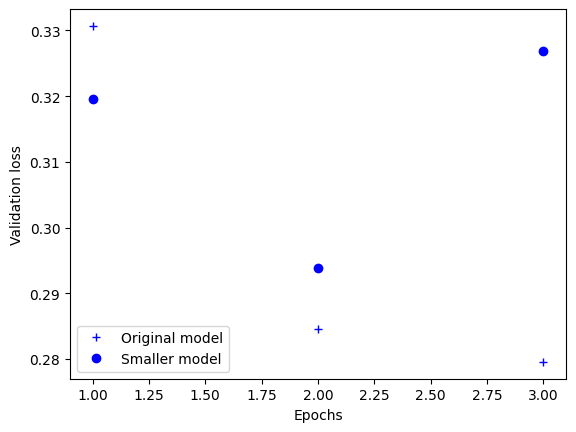

In [40]:
# b+ is for "blue cross"
plt.plot(epochs, model_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the smaller network starts overfitting later than the reference one (after 6 epochs rather than 4) and its performance
degrades much more slowly once it starts overfitting.

Now, for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

#### Original vs Bigger one

Here's how the bigger network fares compared to the reference one. The dots are the validation loss values of the bigger network, and the
crosses are the initial network.

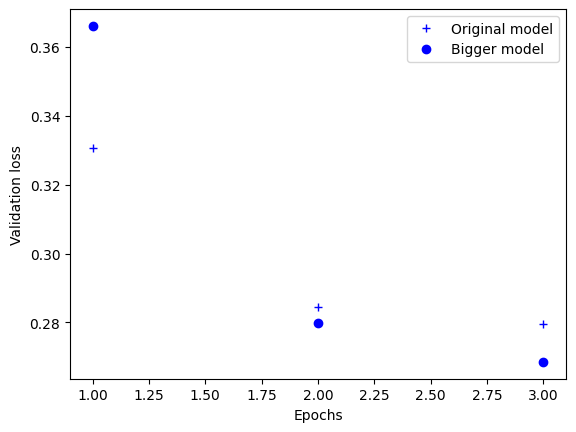

In [41]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

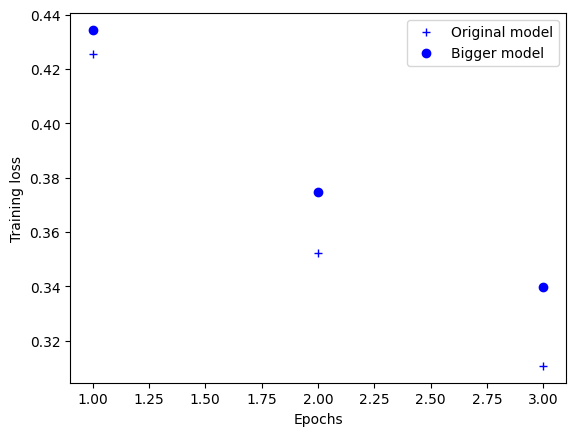

In [42]:
model_train_loss = model_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, model_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## Adding weight regularization

In [46]:
from keras import regularizers

l2_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001),
                           input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                         kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(number_of_classes)
])

l2_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [47]:
l2_model_hist = l2_model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=number_of_epochs
)

Epoch 1/3


353/353 ━━━━━━━━━━━━━━━━━━━━ 244s 685ms/step - accuracy: 0.7651 - loss: 0.6463 - val_accuracy: 0.8544 - val_loss: 0.3999
Epoch 2/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 225s 636ms/step - accuracy: 0.8329 - loss: 0.4297 - val_accuracy: 0.8679 - val_loss: 0.3719
Epoch 3/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 224s 635ms/step - accuracy: 0.8524 - loss: 0.3995 - val_accuracy: 0.8782 - val_loss: 0.3368


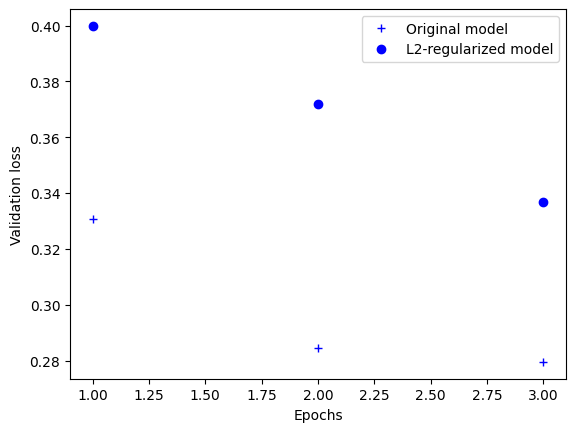

In [48]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [49]:

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding dropout

In [52]:
dpt_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(number_of_classes)
])

dpt_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [53]:
dpt_model_hist = dpt_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=3
)

Epoch 1/3


353/353 ━━━━━━━━━━━━━━━━━━━━ 221s 619ms/step - accuracy: 0.7735 - loss: 0.5286 - val_accuracy: 0.8810 - val_loss: 0.3333
Epoch 2/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 235s 666ms/step - accuracy: 0.8387 - loss: 0.3896 - val_accuracy: 0.8735 - val_loss: 0.3272
Epoch 3/3
353/353 ━━━━━━━━━━━━━━━━━━━━ 231s 656ms/step - accuracy: 0.8574 - loss: 0.3536 - val_accuracy: 0.8818 - val_loss: 0.2911


Let's plot the results:

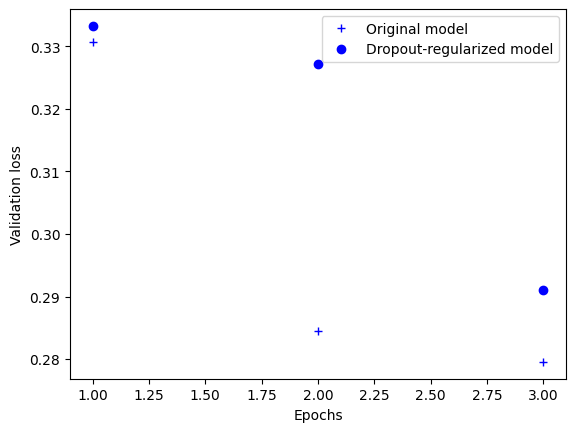

In [54]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=69d16a0c-3b60-4432-922a-308938fb80a3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>